

## Import the necessary libraries



In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Read the train.csv file and view the format and data types get some idea

In [2]:
# space_df = pd.read_csv('../input/spaceship-titanic/train.csv')
space_df = pd.read_csv('train.csv')
space_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
space_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


## Next few steps involve data preprocessing like checking and handling missing values as well as dropping some unnecessary columns

In [4]:
space_df['Age']=space_df['Age'].fillna(space_df['Age'].mean())

In [5]:
space_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [6]:
space_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [7]:
space_df['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [8]:
space_df1 = space_df[space_df['HomePlanet'].notnull()]
space_df1['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [9]:
space_df1['Age']=space_df1['Age'].astype(int)
space_df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [10]:
space_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8492 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8492 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8277 non-null   object 
 3   Cabin         8299 non-null   object 
 4   Destination   8314 non-null   object 
 5   Age           8492 non-null   int64  
 6   VIP           8292 non-null   object 
 7   RoomService   8317 non-null   float64
 8   FoodCourt     8311 non-null   float64
 9   ShoppingMall  8291 non-null   float64
 10  Spa           8312 non-null   float64
 11  VRDeck        8305 non-null   float64
 12  Name          8299 non-null   object 
 13  Transported   8492 non-null   bool   
dtypes: bool(1), float64(5), int64(1), object(7)
memory usage: 937.1+ KB


In [11]:
space_df1=space_df1[space_df1['Destination'].notnull()]
space_df1['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars'], dtype=object)

In [12]:
space_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8314 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8314 non-null   object 
 1   HomePlanet    8314 non-null   object 
 2   CryoSleep     8103 non-null   object 
 3   Cabin         8125 non-null   object 
 4   Destination   8314 non-null   object 
 5   Age           8314 non-null   int64  
 6   VIP           8117 non-null   object 
 7   RoomService   8142 non-null   float64
 8   FoodCourt     8139 non-null   float64
 9   ShoppingMall  8118 non-null   float64
 10  Spa           8137 non-null   float64
 11  VRDeck        8129 non-null   float64
 12  Name          8125 non-null   object 
 13  Transported   8314 non-null   bool   
dtypes: bool(1), float64(5), int64(1), object(7)
memory usage: 917.5+ KB


In [13]:
space_df1.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       211
Cabin           189
Destination       0
Age               0
VIP             197
RoomService     172
FoodCourt       175
ShoppingMall    196
Spa             177
VRDeck          185
Name            189
Transported       0
dtype: int64

In [14]:
space_df2=space_df1.drop(['PassengerId','Cabin','Name'],axis=1)
space_df2

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,PSO J318.5-22,18,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,TRAPPIST-1e,26,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,55 Cancri e,32,False,0.0,1049.0,0.0,353.0,3235.0,False


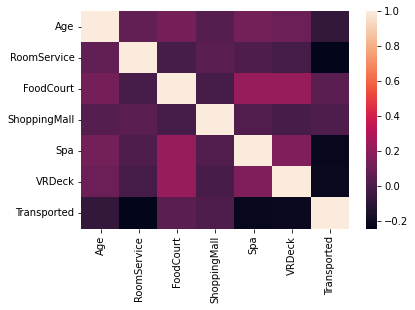

In [15]:
sns.heatmap(space_df2.corr())

In [16]:
space_df2.isnull().sum()

HomePlanet        0
CryoSleep       211
Destination       0
Age               0
VIP             197
RoomService     172
FoodCourt       175
ShoppingMall    196
Spa             177
VRDeck          185
Transported       0
dtype: int64

In [17]:
space_df2['FoodCourt'].fillna(space_df2['FoodCourt'].mean(), inplace=True)
space_df2['Spa'].fillna(space_df2['Spa'].mean(), inplace=True)
space_df2['VRDeck'].fillna(space_df2['VRDeck'].median(), inplace=True)
space_df2['ShoppingMall'].fillna(space_df2['ShoppingMall'].mean(), inplace=True)
space_df2['RoomService'].fillna(space_df2['RoomService'].mean(), inplace=True)

In [18]:
space_df2.isnull().sum()

HomePlanet        0
CryoSleep       211
Destination       0
Age               0
VIP             197
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [19]:
space_df2

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,PSO J318.5-22,18,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,TRAPPIST-1e,26,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,55 Cancri e,32,False,0.0,1049.0,0.0,353.0,3235.0,False


In [20]:
space_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8314 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8314 non-null   object 
 1   CryoSleep     8103 non-null   object 
 2   Destination   8314 non-null   object 
 3   Age           8314 non-null   int64  
 4   VIP           8117 non-null   object 
 5   RoomService   8314 non-null   float64
 6   FoodCourt     8314 non-null   float64
 7   ShoppingMall  8314 non-null   float64
 8   Spa           8314 non-null   float64
 9   VRDeck        8314 non-null   float64
 10  Transported   8314 non-null   bool   
dtypes: bool(1), float64(5), int64(1), object(4)
memory usage: 722.6+ KB


In [21]:
space_df2['CryoSleep'].fillna(space_df2['CryoSleep'].mode()[0],inplace=True)
space_df2['VIP'].fillna(space_df2['VIP'].mode()[0],inplace=True)
space_df2.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

Finalized and revised dataset

In [22]:
space_df2

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,PSO J318.5-22,18,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,TRAPPIST-1e,26,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,55 Cancri e,32,False,0.0,1049.0,0.0,353.0,3235.0,False


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


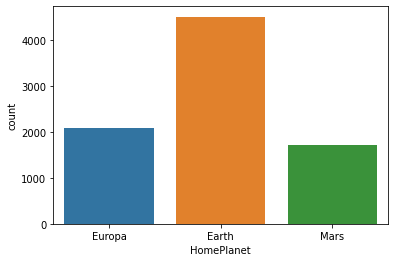

In [23]:
sns.countplot(space_df2['HomePlanet'])

In [24]:
fig = px.histogram(space_df2, x=space_df2["HomePlanet"],
             color='Transported', barmode='group',width=700,
             height=500)
fig.show()

In [25]:
fig1 = px.histogram(space_df2, x=space_df2["Destination"],
             color='Transported', barmode='group',width=750,
             height=700)
fig1.show()

## Splitting of input and output columns

In [26]:
X=space_df2.drop(columns=['Transported'])
Y=space_df2['Transported']

In [27]:
X

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Europa,False,TRAPPIST-1e,39,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,24,False,109.0,9.0,25.0,549.0,44.0
2,Europa,False,TRAPPIST-1e,58,True,43.0,3576.0,0.0,6715.0,49.0
3,Europa,False,TRAPPIST-1e,33,False,0.0,1283.0,371.0,3329.0,193.0
4,Earth,False,TRAPPIST-1e,16,False,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41,True,0.0,6819.0,0.0,1643.0,74.0
8689,Earth,True,PSO J318.5-22,18,False,0.0,0.0,0.0,0.0,0.0
8690,Earth,False,TRAPPIST-1e,26,False,0.0,0.0,1872.0,1.0,0.0
8691,Europa,False,55 Cancri e,32,False,0.0,1049.0,0.0,353.0,3235.0


In [28]:
Y

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8314, dtype: bool

## Label encoding of categorical variables to make it ready for training with various algorithms

In [29]:
lm = LabelEncoder()
X['CryoSleep']=lm.fit_transform(X['CryoSleep'])
X['VIP']=lm.fit_transform(X['VIP'])
X['HomePlanet']=lm.fit_transform(X['HomePlanet'])
X['Destination']=lm.fit_transform(X['Destination'])

In [30]:
X

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,0,2,39,0,0.0,0.0,0.0,0.0,0.0
1,0,0,2,24,0,109.0,9.0,25.0,549.0,44.0
2,1,0,2,58,1,43.0,3576.0,0.0,6715.0,49.0
3,1,0,2,33,0,0.0,1283.0,371.0,3329.0,193.0
4,0,0,2,16,0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41,1,0.0,6819.0,0.0,1643.0,74.0
8689,0,1,1,18,0,0.0,0.0,0.0,0.0,0.0
8690,0,0,2,26,0,0.0,0.0,1872.0,1.0,0.0
8691,1,0,0,32,0,0.0,1049.0,0.0,353.0,3235.0


In [31]:
Y=lm.fit_transform(Y)
Y

array([0, 1, 0, ..., 1, 0, 1])

## Feature selection using chi square test and using that, selecting just the top 5 features impacting the output column

In [32]:
chi_features = SelectKBest(chi2,k=5)
xk_feature = chi_features.fit_transform(X,Y)

In [33]:
fvalue_selector = SelectKBest(f_classif, k=5)
f_kbest = fvalue_selector.fit_transform(X, Y)

## `Test train split of X and Y using features from chi square test`

In [34]:
xtrain, xtest, ytrain, ytest = train_test_split(xk_feature, Y, test_size = 0.2, random_state = 111)

## Now is the modelling and accuracy assessing stage

In [35]:
#XGBOOST ALGORITHM
model = XGBClassifier()
model.fit(xtrain, ytrain)

XGBClassifier()

In [36]:
y_pred = model.predict(xtest)
predictions = [round(value) for value in y_pred]

In [37]:
accuracy = accuracy_score(ytest, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.40%


In [38]:
#RANDOM FOREST CLASSIFIER
forest = RandomForestClassifier(criterion='gini',n_estimators=3,random_state=1,n_jobs=5)

In [39]:
forest.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=3, n_jobs=5, random_state=1)

In [40]:
y_pred_1 = forest.predict(xtest)

In [41]:
print((accuracy_score(ytest, y_pred_1))*100)

77.45039085989175


In [42]:
#DECISION TREE CLASSIFIER
clf = DecisionTreeClassifier()

In [43]:
clf = clf.fit(xtrain,ytrain)

In [44]:
ypred = clf.predict(xtest)

In [45]:
print((accuracy_score(ytest,ypred))*100)

75.22549609140108


In [46]:
#LOGISTIC REGRESSION
logreg = LogisticRegression(solver="newton-cg",penalty="l2",random_state=16)

In [47]:
logreg.fit(xtrain, ytrain)

LogisticRegression(random_state=16, solver='newton-cg')

In [48]:
y_pred1 = logreg.predict(xtest)

In [49]:
print(accuracy_score(ytest,y_pred1))

0.788334335538184


## Test train split of X and Y using features from ANOVA f-values followed by modelling

In [50]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(f_kbest, Y, test_size = 0.3, random_state = 111)

In [51]:
#XGBOOST ALGORITHM
model = XGBClassifier(booster="dart",max_depth=5)
model.fit(xtrain1, ytrain1)

XGBClassifier(booster='dart', max_depth=5)

In [52]:
ypred1 = model.predict(xtest1)
predictions = [round(value) for value in ypred1]

In [53]:
accuracy = accuracy_score(ytest1, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 79.04%


In [54]:
#RANDOM FOREST CLASSIFIER
forest = RandomForestClassifier(criterion='gini',n_estimators=5,random_state=1,n_jobs=5)

In [55]:
forest.fit(xtrain1, ytrain1)

RandomForestClassifier(n_estimators=5, n_jobs=5, random_state=1)

In [56]:
ypred_1 = forest.predict(xtest1)

In [57]:
print((accuracy_score(ytest1, ypred_1))*100)

76.83366733466934


In [58]:
#DECISION TREE
clf1 = clf.fit(xtrain1,ytrain1)

In [59]:
pred = clf.predict(xtest1)

In [60]:
print((accuracy_score(ytest1,pred))*100)

73.9879759519038


In [61]:
logreg.fit(xtrain1, ytrain1)

LogisticRegression(random_state=16, solver='newton-cg')

In [62]:
y_pred_ = logreg.predict(xtest1)

In [63]:
print(accuracy_score(ytest1,y_pred_))

0.756312625250501


## Modelling with the version of dataset without feature selection

In [64]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, Y, test_size = 0.3, random_state = 111)

In [65]:
#XGBOOST ALGORITHM
model = XGBClassifier()
model.fit(x_train1, y_train1)

XGBClassifier()

In [66]:
pred1 = model.predict(x_test1)
predictions_1 = [round(value) for value in pred1]

In [67]:
accuracy = accuracy_score(y_test1, predictions_1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.16%


In [68]:
#RANDOM FOREST CLASSIFIER
forest.fit(x_train1, y_train1)

RandomForestClassifier(n_estimators=5, n_jobs=5, random_state=1)

In [69]:
pred_1 = forest.predict(x_test1)

In [70]:
print((accuracy_score(y_test1, pred_1))*100)

76.71342685370742


In [71]:
#DECISION TREE
clf1 = clf.fit(x_train1,y_train1)

In [72]:
pred2 = clf.predict(x_test1)

In [73]:
print((accuracy_score(y_test1,pred2))*100)

71.98396793587175


In [74]:
#LOGISTIC REGRESSION
logreg.fit(x_train1, y_train1)

LogisticRegression(random_state=16, solver='newton-cg')

In [75]:
pred1_ = logreg.predict(x_test1)

In [76]:
print(accuracy_score(y_test1,pred1_))

0.7887775551102204


## Testing with 'test.csv'

In [77]:
# test_df = pd.read_csv('../input/spaceship-titanic/test.csv') 
test_df = pd.read_csv('test.csv') 

In [78]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [90]:
test_df.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64



## Handling with missing values

In [100]:
test_df['FoodCourt'].fillna(test_df['FoodCourt'].mean(), inplace=True)
test_df['Spa'].fillna(test_df['Spa'].mean(), inplace=True)
test_df['VRDeck'].fillna(test_df['VRDeck'].median(), inplace=True)
test_df['ShoppingMall'].fillna(test_df['ShoppingMall'].mean(), inplace=True)
test_df['RoomService'].fillna(test_df['RoomService'].mean(), inplace=True)
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)


In [101]:
test_df.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age               0
VIP              93
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name             94
dtype: int64

In [107]:
test_df['Age']=test_df['Age'].astype(int)
test_df[['Cabin', 'Name']] = test_df[['Cabin','Name']].fillna('')


In [109]:
test_df.isnull().sum()

PassengerId      0
HomePlanet      87
CryoSleep       93
Cabin            0
Destination     92
Age              0
VIP             93
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name             0
dtype: int64

In [95]:
a = test_df[['PassengerId']]

In [96]:
a

,PassengerId
0,0013_01
1,0018_01
2,0019_01
3,0021_01
4,0023_01
...,...
4272,9266_02
4273,9269_01
4274,9271_01
4275,9273_01


In [111]:
# lm = LabelEncoder()
test_df['CryoSleep']=lm.fit_transform(test_df['CryoSleep'])
test_df['VIP']=lm.fit_transform(test_df['VIP'])
test_df['HomePlanet']=lm.fit_transform(test_df['HomePlanet'])
test_df['Destination']=lm.fit_transform(test_df['Destination'])

In [112]:
test_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,0,1,G/3/S,2,27,0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,0,0,F/4/S,2,19,0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,1,1,C/0/S,0,31,0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,1,0,C/1/S,2,38,0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,0,0,F/5/S,2,20,0,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,0,1,G/1496/S,2,34,0,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,0,0,,2,42,0,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,2,1,D/296/P,0,28,0,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,1,0,D/297/P,3,28,0,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [113]:
test_df2=test_df.drop(['PassengerId','Cabin','Name'],axis=1)

In [114]:
test_df2

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0,1,2,27,0,0.0,0.0,0.0,0.0,0.0
1,0,0,2,19,0,0.0,9.0,0.0,2823.0,0.0
2,1,1,0,31,0,0.0,0.0,0.0,0.0,0.0
3,1,0,2,38,0,0.0,6652.0,0.0,181.0,585.0
4,0,0,2,20,0,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4272,0,1,2,34,0,0.0,0.0,0.0,0.0,0.0
4273,0,0,2,42,0,0.0,847.0,17.0,10.0,144.0
4274,2,1,0,28,0,0.0,0.0,0.0,0.0,0.0
4275,1,0,3,28,0,0.0,2680.0,0.0,0.0,523.0


In [115]:
test_df2.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [116]:
X_train= X
X_test=test_df2
Y_train=Y

In [117]:
Y_train

array([0, 1, 0, ..., 1, 0, 1])

In [118]:
model = XGBClassifier()
model.fit(X_train, Y_train)

XGBClassifier()

In [119]:
test_pred = model.predict(X_test)
len(test_pred)

4277

In [121]:
sub_df=pd.read_csv('sample_submission.csv')

In [122]:
sub_df

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [123]:
sub_df['Transported']=test_pred
sub_df['Transported']=sub_df['Transported'].replace(1,True)
sub_df['Transported']=sub_df['Transported'].replace(0,False)

In [124]:
sub_df

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [127]:
sub_df.to_csv('my_submission.csv', index=False,header=1)

